In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("combined_data.csv")
df = df.rename({"Tarih" : "Date", "Saat" : "Hour"}, axis=1)
print(df.head())

         Date   Hour PTF (TL/MWh) PTF (USD/MWh) PTF (EUR/MWh)
0  01.01.2018  00:00       207,60         55,04         45,97
1  01.01.2018  01:00       205,34         54,44         45,47
2  01.01.2018  02:00       164,94         43,73         36,53
3  01.01.2018  03:00       154,52         40,97         34,22
4  01.01.2018  04:00       112,64         29,86         24,95


In [27]:
df["Hour"] = df["Hour"].astype(str)
df["Hour"] = df["Hour"] + ":00"

df["DateTime"] = df[["Date", "Hour"]].apply(" ".join, axis=1)
print(df.head())

         Date      Hour PTF (TL/MWh) PTF (USD/MWh) PTF (EUR/MWh)  \
0  01.01.2018  00:00:00       207,60         55,04         45,97   
1  01.01.2018  01:00:00       205,34         54,44         45,47   
2  01.01.2018  02:00:00       164,94         43,73         36,53   
3  01.01.2018  03:00:00       154,52         40,97         34,22   
4  01.01.2018  04:00:00       112,64         29,86         24,95   

              DateTime  
0  01.01.2018 00:00:00  
1  01.01.2018 01:00:00  
2  01.01.2018 02:00:00  
3  01.01.2018 03:00:00  
4  01.01.2018 04:00:00  


In [28]:
df = df[["DateTime", "PTF (USD/MWh)"]]
print(df.head())

              DateTime PTF (USD/MWh)
0  01.01.2018 00:00:00         55,04
1  01.01.2018 01:00:00         54,44
2  01.01.2018 02:00:00         43,73
3  01.01.2018 03:00:00         40,97
4  01.01.2018 04:00:00         29,86


In [29]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d.%m.%Y %H:%M:%S")
df["DateTime"] = df["DateTime"].dt.strftime("%Y-%m-%d %H:%M:%S")
print(df.head())

              DateTime PTF (USD/MWh)
0  2018-01-01 00:00:00         55,04
1  2018-01-01 01:00:00         54,44
2  2018-01-01 02:00:00         43,73
3  2018-01-01 03:00:00         40,97
4  2018-01-01 04:00:00         29,86


In [30]:
df["PTF (USD/MWh)"] = df["PTF (USD/MWh)"].str.replace(".", "", regex=False)
df["PTF (USD/MWh)"] = df["PTF (USD/MWh)"].str.replace(",", ".", regex=False)
df["PTF (USD/MWh)"] = df["PTF (USD/MWh)"].astype(float)
print(df.head())

              DateTime  PTF (USD/MWh)
0  2018-01-01 00:00:00          55.04
1  2018-01-01 01:00:00          54.44
2  2018-01-01 02:00:00          43.73
3  2018-01-01 03:00:00          40.97
4  2018-01-01 04:00:00          29.86


In [31]:
df.isnull().sum()

DateTime         0
PTF (USD/MWh)    0
dtype: int64

In [32]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y-%m-%d %H:%M:%S")
print(df.head())
print(df.dtypes)

             DateTime  PTF (USD/MWh)
0 2018-01-01 00:00:00          55.04
1 2018-01-01 01:00:00          54.44
2 2018-01-01 02:00:00          43.73
3 2018-01-01 03:00:00          40.97
4 2018-01-01 04:00:00          29.86
DateTime         datetime64[ns]
PTF (USD/MWh)           float64
dtype: object


In [33]:
df = df.sort_values(by = "DateTime", ascending=True)
print(df.head())

                 DateTime  PTF (USD/MWh)
26328 2012-01-01 00:00:00          79.46
26329 2012-01-01 01:00:00          68.87
26330 2012-01-01 02:00:00          62.06
26331 2012-01-01 03:00:00          53.89
26332 2012-01-01 04:00:00          28.60


In [34]:
print("Starting Date:", df["DateTime"].min())
print("Starting Date:", df["DateTime"].max())

Starting Date: 2012-01-01 00:00:00
Starting Date: 2024-06-28 23:00:00


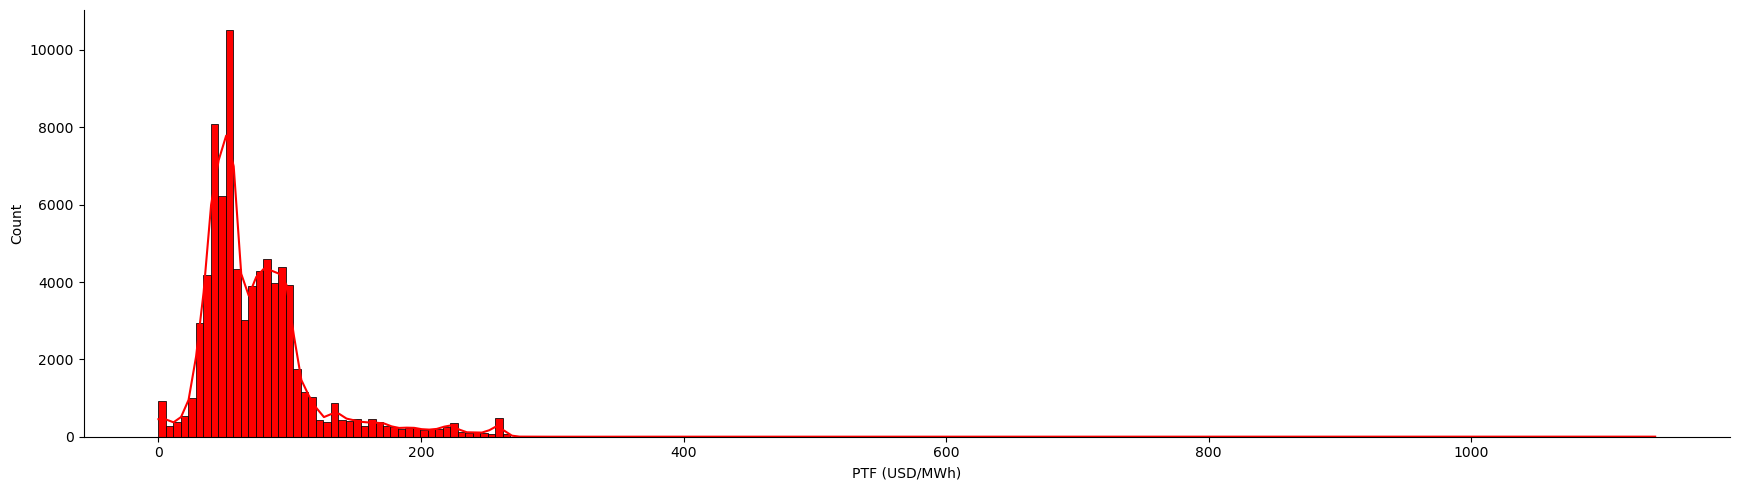

In [35]:
sns.displot(data=df, x="PTF (USD/MWh)", kde=True, bins=200, color="red",
            facecolor="#FF0000", height=5, aspect=3.5);

In [36]:
df1 = df.set_index("DateTime")
df1.head()

,PTF (USD/MWh)
DateTime,
2012-01-01 00:00:00,79.46
2012-01-01 01:00:00,68.87
2012-01-01 02:00:00,62.06
2012-01-01 03:00:00,53.89
2012-01-01 04:00:00,28.60


In [37]:
df1 = df1[(df1.index >= "2018-01-01 00:00:00") & (df1.index <= "2024-01-01 23:00:00")]
df1.tail(5)

,PTF (USD/MWh)
DateTime,
2024-01-01 19:00:00,74.73
2024-01-01 20:00:00,67.94
2024-01-01 21:00:00,54.86
2024-01-01 22:00:00,44.16
2024-01-01 23:00:00,31.04


In [38]:
df.tail()

,DateTime,PTF (USD/MWh)
52675,2024-06-28 19:00:00,78.15
52676,2024-06-28 20:00:00,80.84
52677,2024-06-28 21:00:00,80.84
52678,2024-06-28 22:00:00,75.03
52679,2024-06-28 23:00:00,67.03


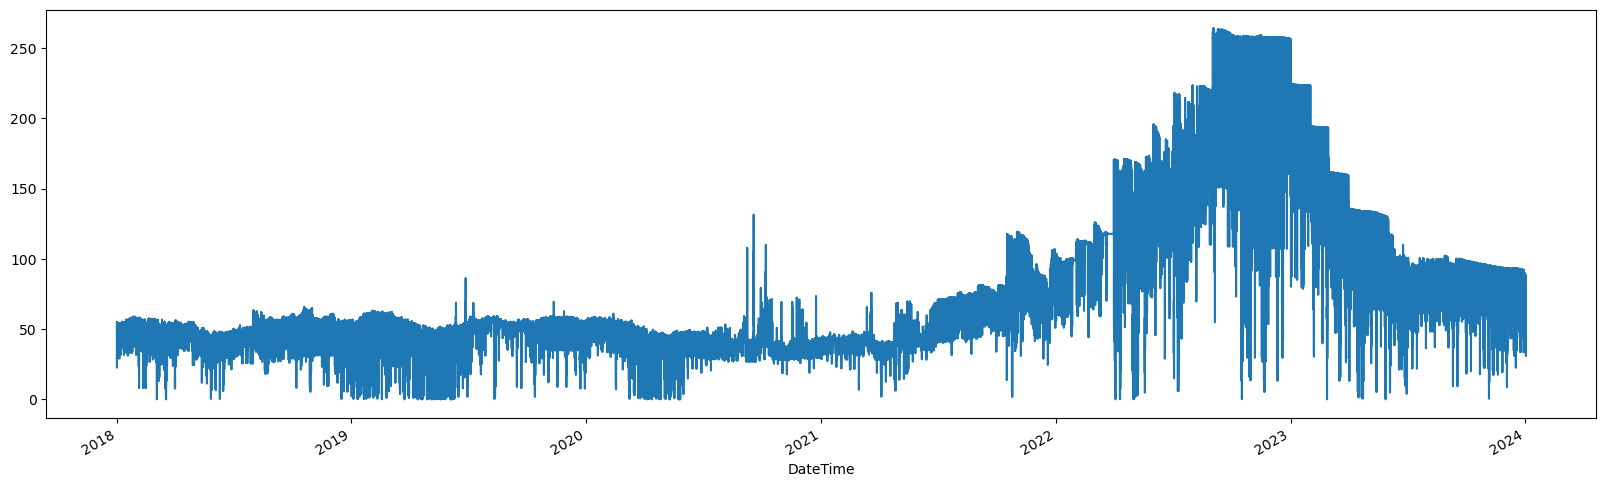

In [39]:
df1["PTF (USD/MWh)"].plot(figsize=(20, 6))
plt.show()

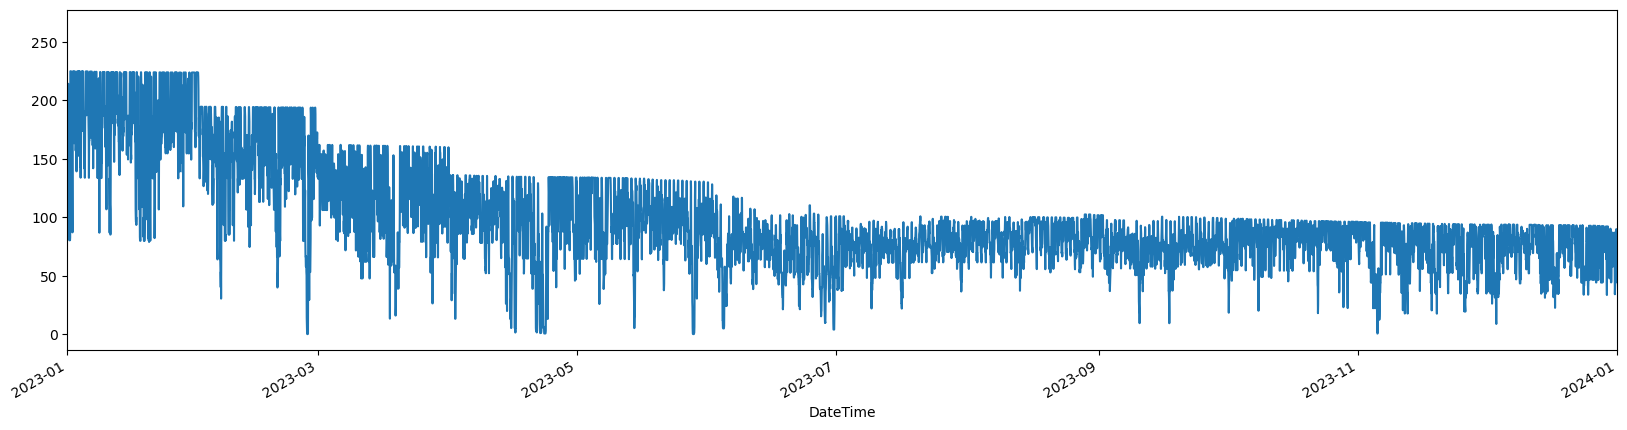

In [40]:
df1["PTF (USD/MWh)"].plot(xlim=["2023-01-01", "2024-01-01"], figsize=(20, 5))
plt.show()

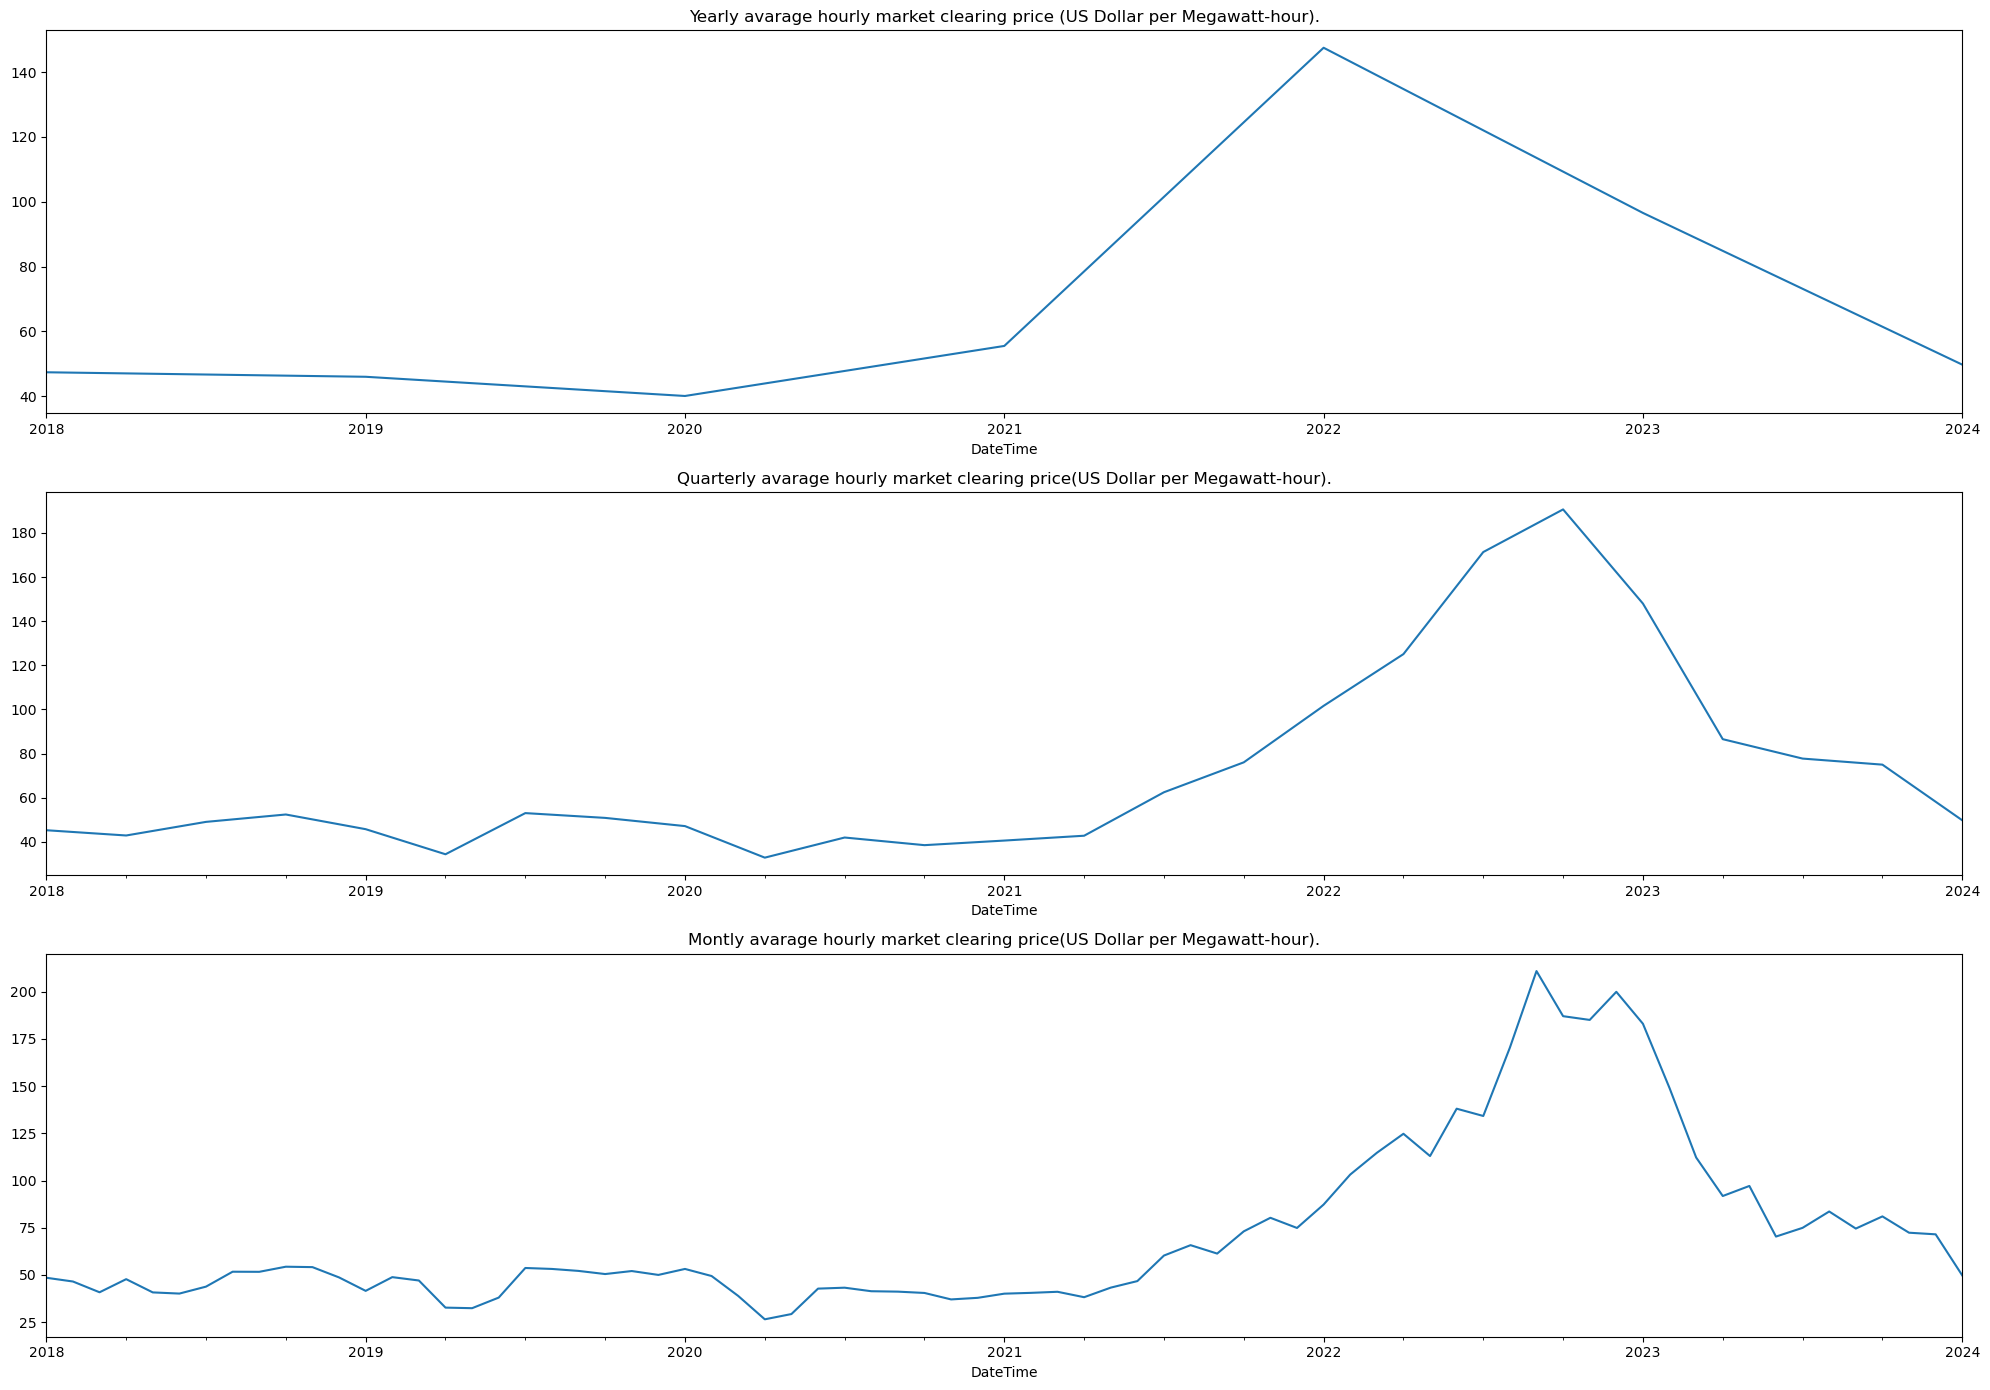

In [41]:
fig, axes = plt.subplots(nrows=3, figsize=(20, 14))

df1.resample(rule="A").mean()["PTF (USD/MWh)"].plot(ax=axes[0], title="Yearly avarage hourly market clearing price (US Dollar per Megawatt-hour).")
df1.resample(rule="QS").mean()["PTF (USD/MWh)"].plot(ax=axes[1], title="Quarterly avarage hourly market clearing price(US Dollar per Megawatt-hour).")
df1.resample(rule="M").mean()["PTF (USD/MWh)"].plot(ax=axes[2], title="Montly avarage hourly market clearing price(US Dollar per Megawatt-hour).")

plt.tight_layout()
plt.show()

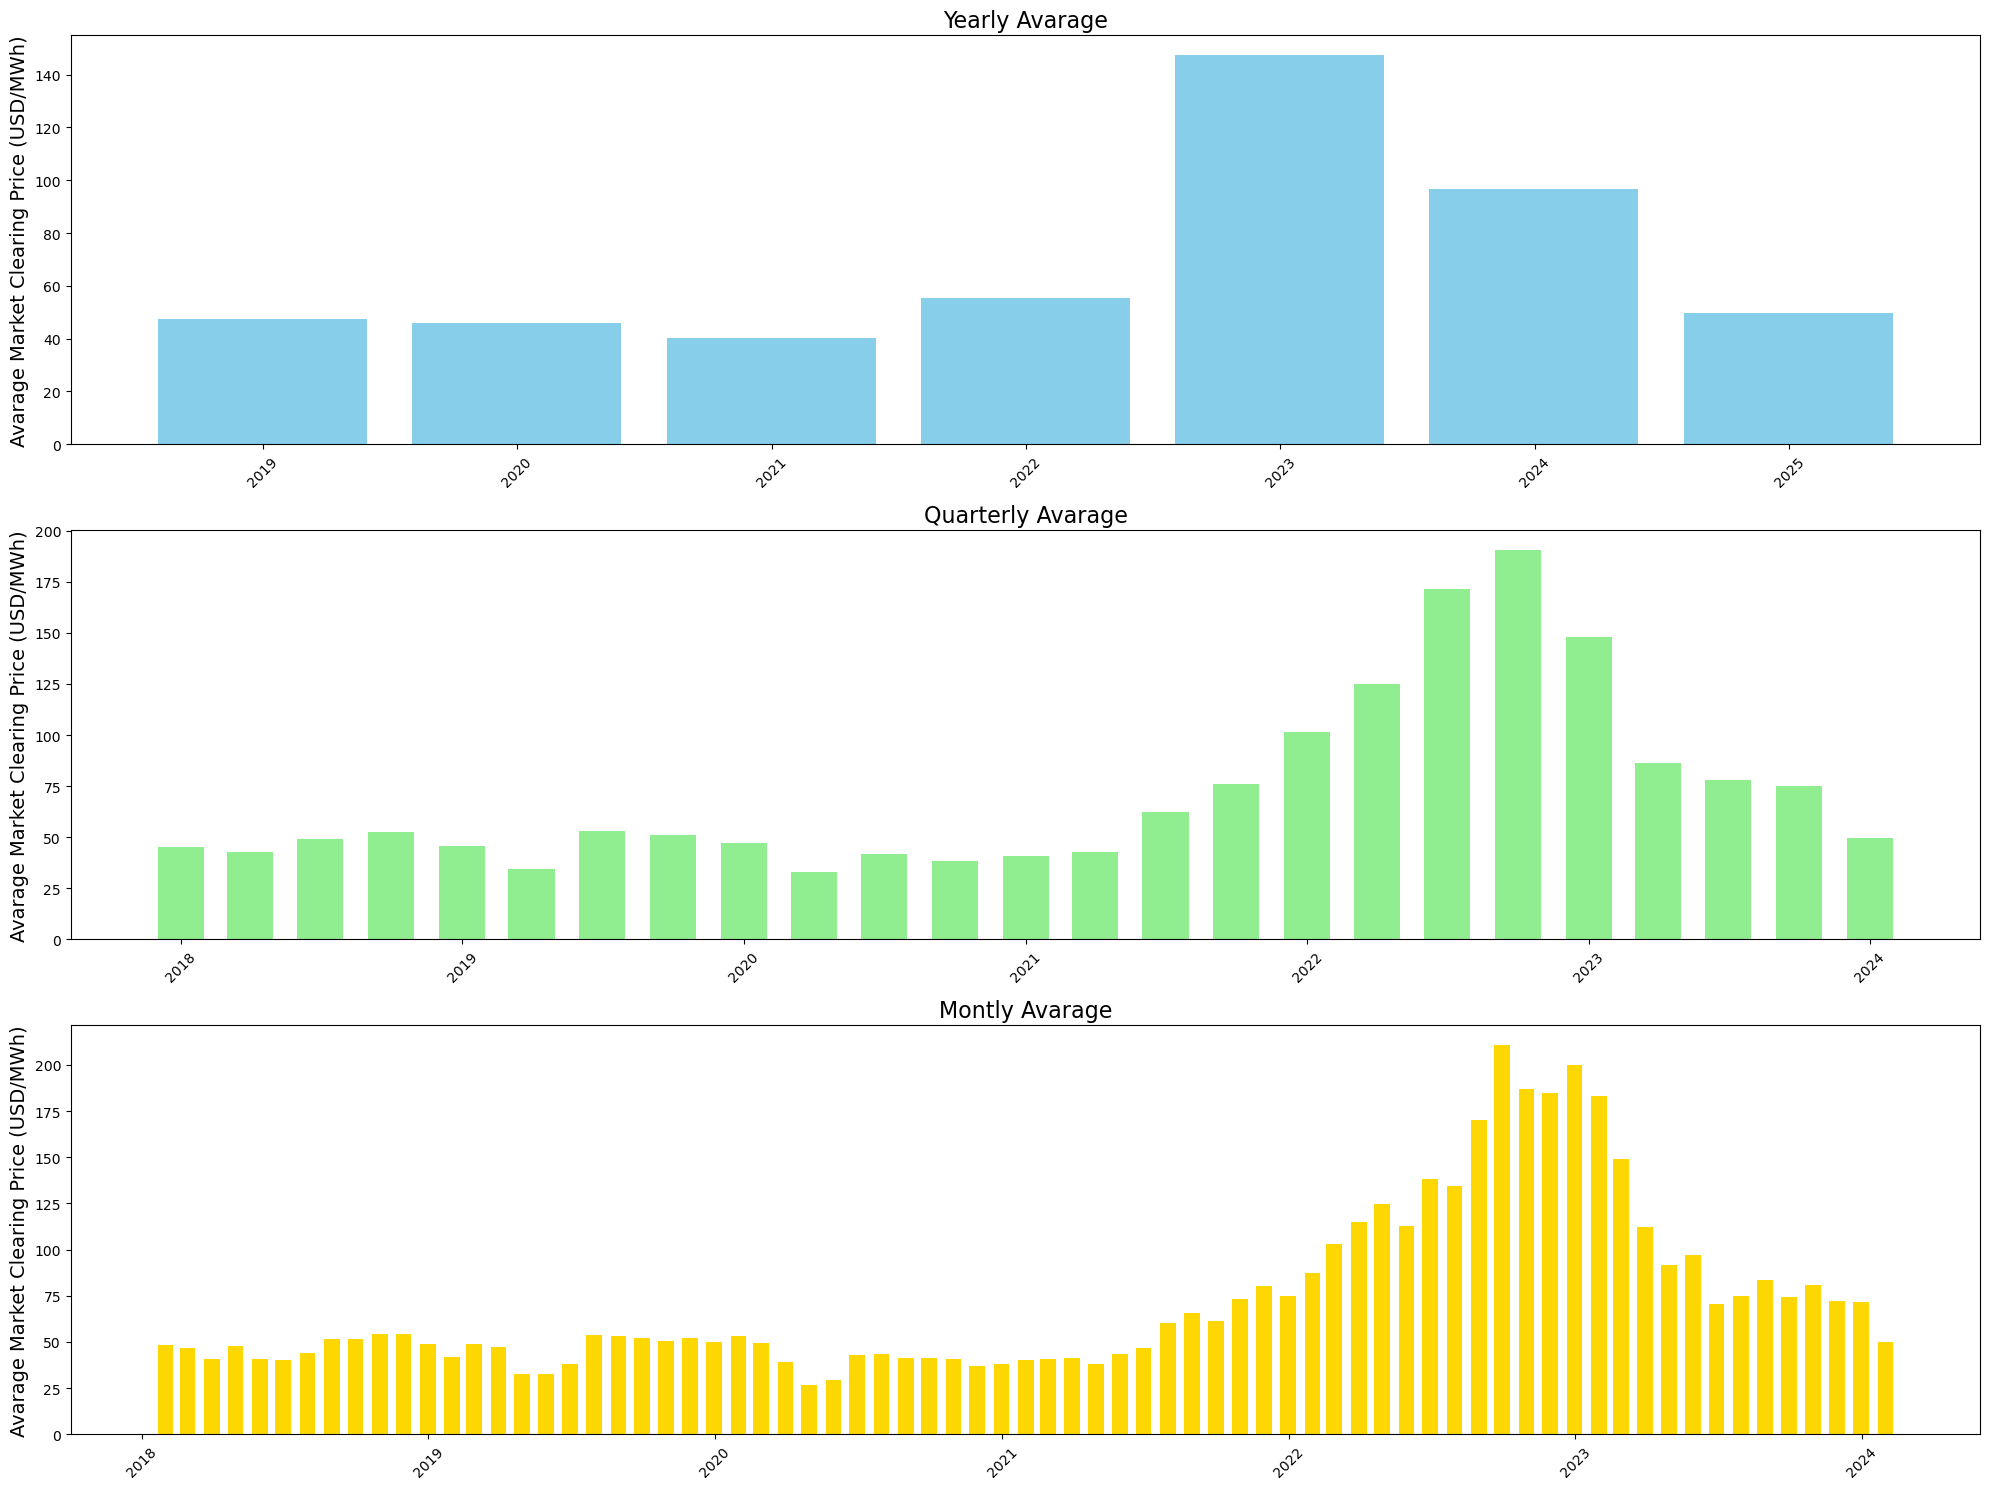

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15))

yearly_mean = df1.resample(rule="A")["PTF (USD/MWh)"].mean()
quarterly_mean = df1.resample(rule="QS")["PTF (USD/MWh)"].mean()
montly_mean = df1.resample(rule="M")["PTF (USD/MWh)"].mean()

colors = ["skyblue", "lightgreen", "gold"]

ax1.bar(yearly_mean.index, yearly_mean, width=300, color=colors[0])
ax1.set_title("Yearly Avarage", fontsize=16)
ax1.set_ylabel("Avarage Market Clearing Price (USD/MWh)", fontsize=14)

ax2.bar(quarterly_mean.index, quarterly_mean, width=60, color=colors[1])
ax2.set_title("Quarterly Avarage", fontsize=16)
ax2.set_ylabel("Avarage Market Clearing Price (USD/MWh)", fontsize=14)

ax3.bar(montly_mean.index, montly_mean, width=20, color=colors[2])
ax3.set_title("Montly Avarage", fontsize=16)
ax3.set_ylabel("Avarage Market Clearing Price (USD/MWh)", fontsize=14)

ax1.tick_params(axis="x", rotation=45)
ax2.tick_params(axis="x", rotation=45)
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

,PTF (USD/MWh)
DateTime,
2018-01-01,1024.69
2018-01-02,1119.07


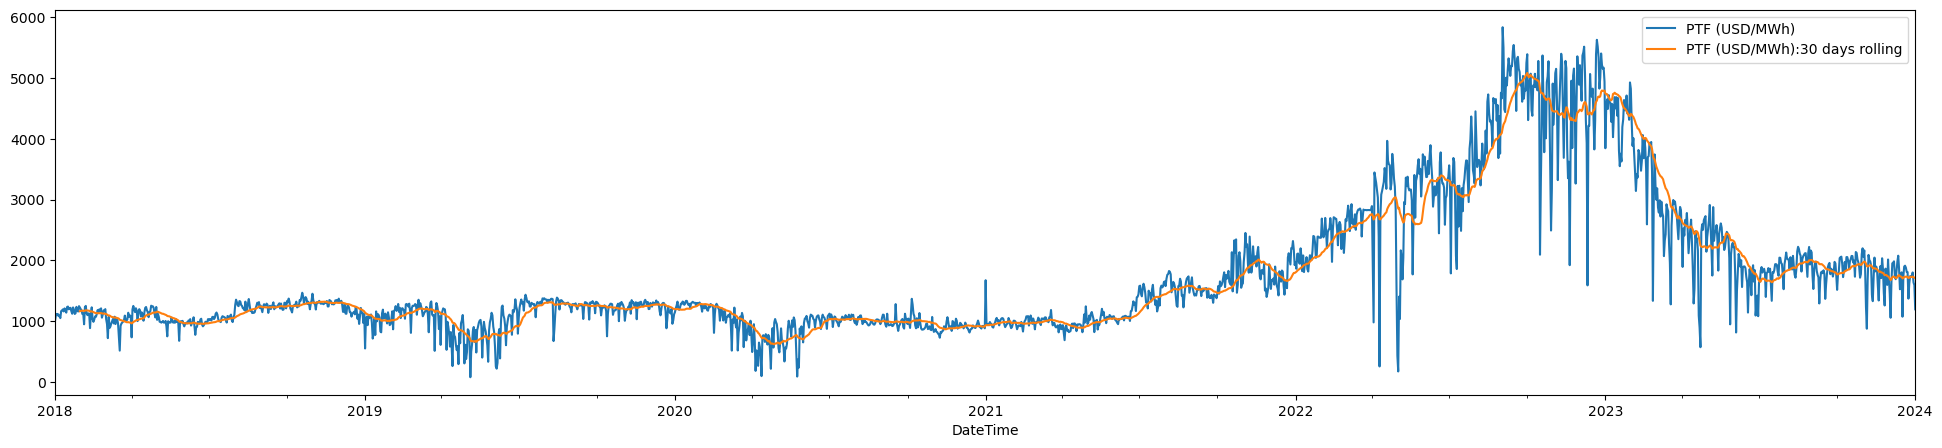

In [43]:
count_date = df1.groupby(df1.index.date)["PTF (USD/MWh)"].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean["DateTime"] = pd.to_datetime(pw_clean.index)
pw_clean = pw_clean.set_index("DateTime")

display(pw_clean.head(2))

pw_clean["PTF (USD/MWh):30 days rolling"] = pw_clean["PTF (USD/MWh)"].rolling(30).mean()

pw_clean[["PTF (USD/MWh)", "PTF (USD/MWh):30 days rolling"]].plot(figsize=(24, 5));

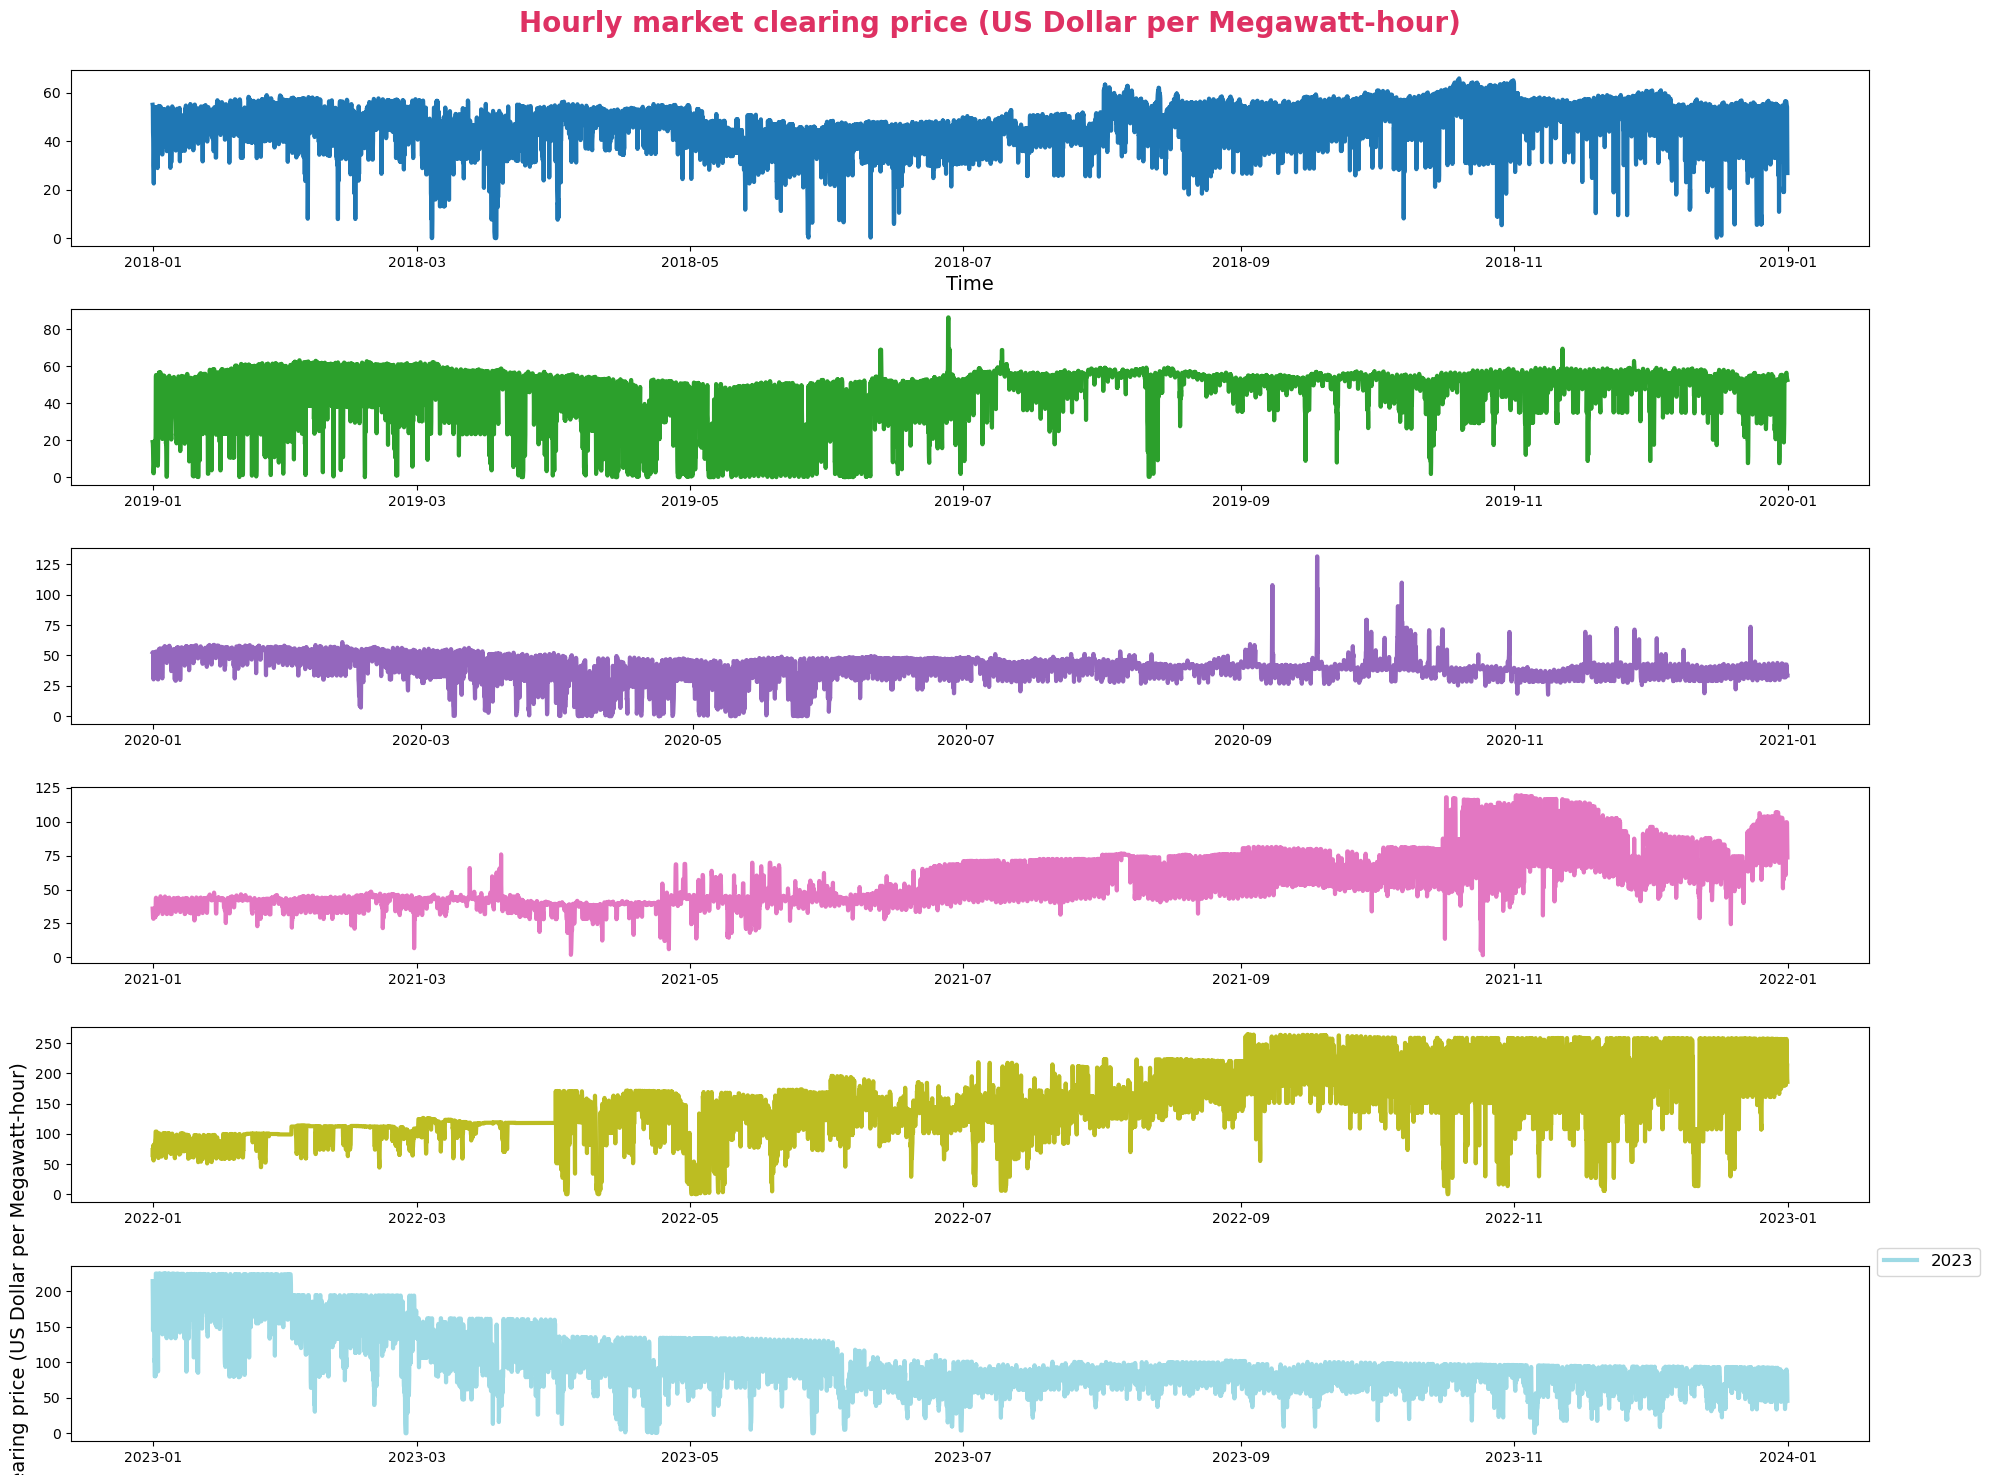

In [44]:
import matplotlib.cm as cm

years = [2018, 2019, 2020, 2021, 2022, 2023]

cmap = cm.get_cmap("tab20")

fig, axs = plt.subplots(len(years), 1, figsize=(20, 15))
for i, year in enumerate(years):
    df_year = df1[(df1.index >= f"{year}-01-01") & (df1.index < f"{year+1}-01-01")]
    color = cmap(i / (len(years) - 1))
    axs[i].plot(df_year, lw=3, color=color, label=f"{year}")

axs[0].set_xlabel("Time", fontsize=14)
axs[-1].set_ylabel("Hourly market clearing price (US Dollar per Megawatt-hour)", fontsize=14)
plt.suptitle("Hourly market clearing price (US Dollar per Megawatt-hour) \n", weight="bold", fontsize=20, color="#DE3163")

handles, labels = axs[-1].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1.15), fontsize=12)

plt.tight_layout()
plt.show()

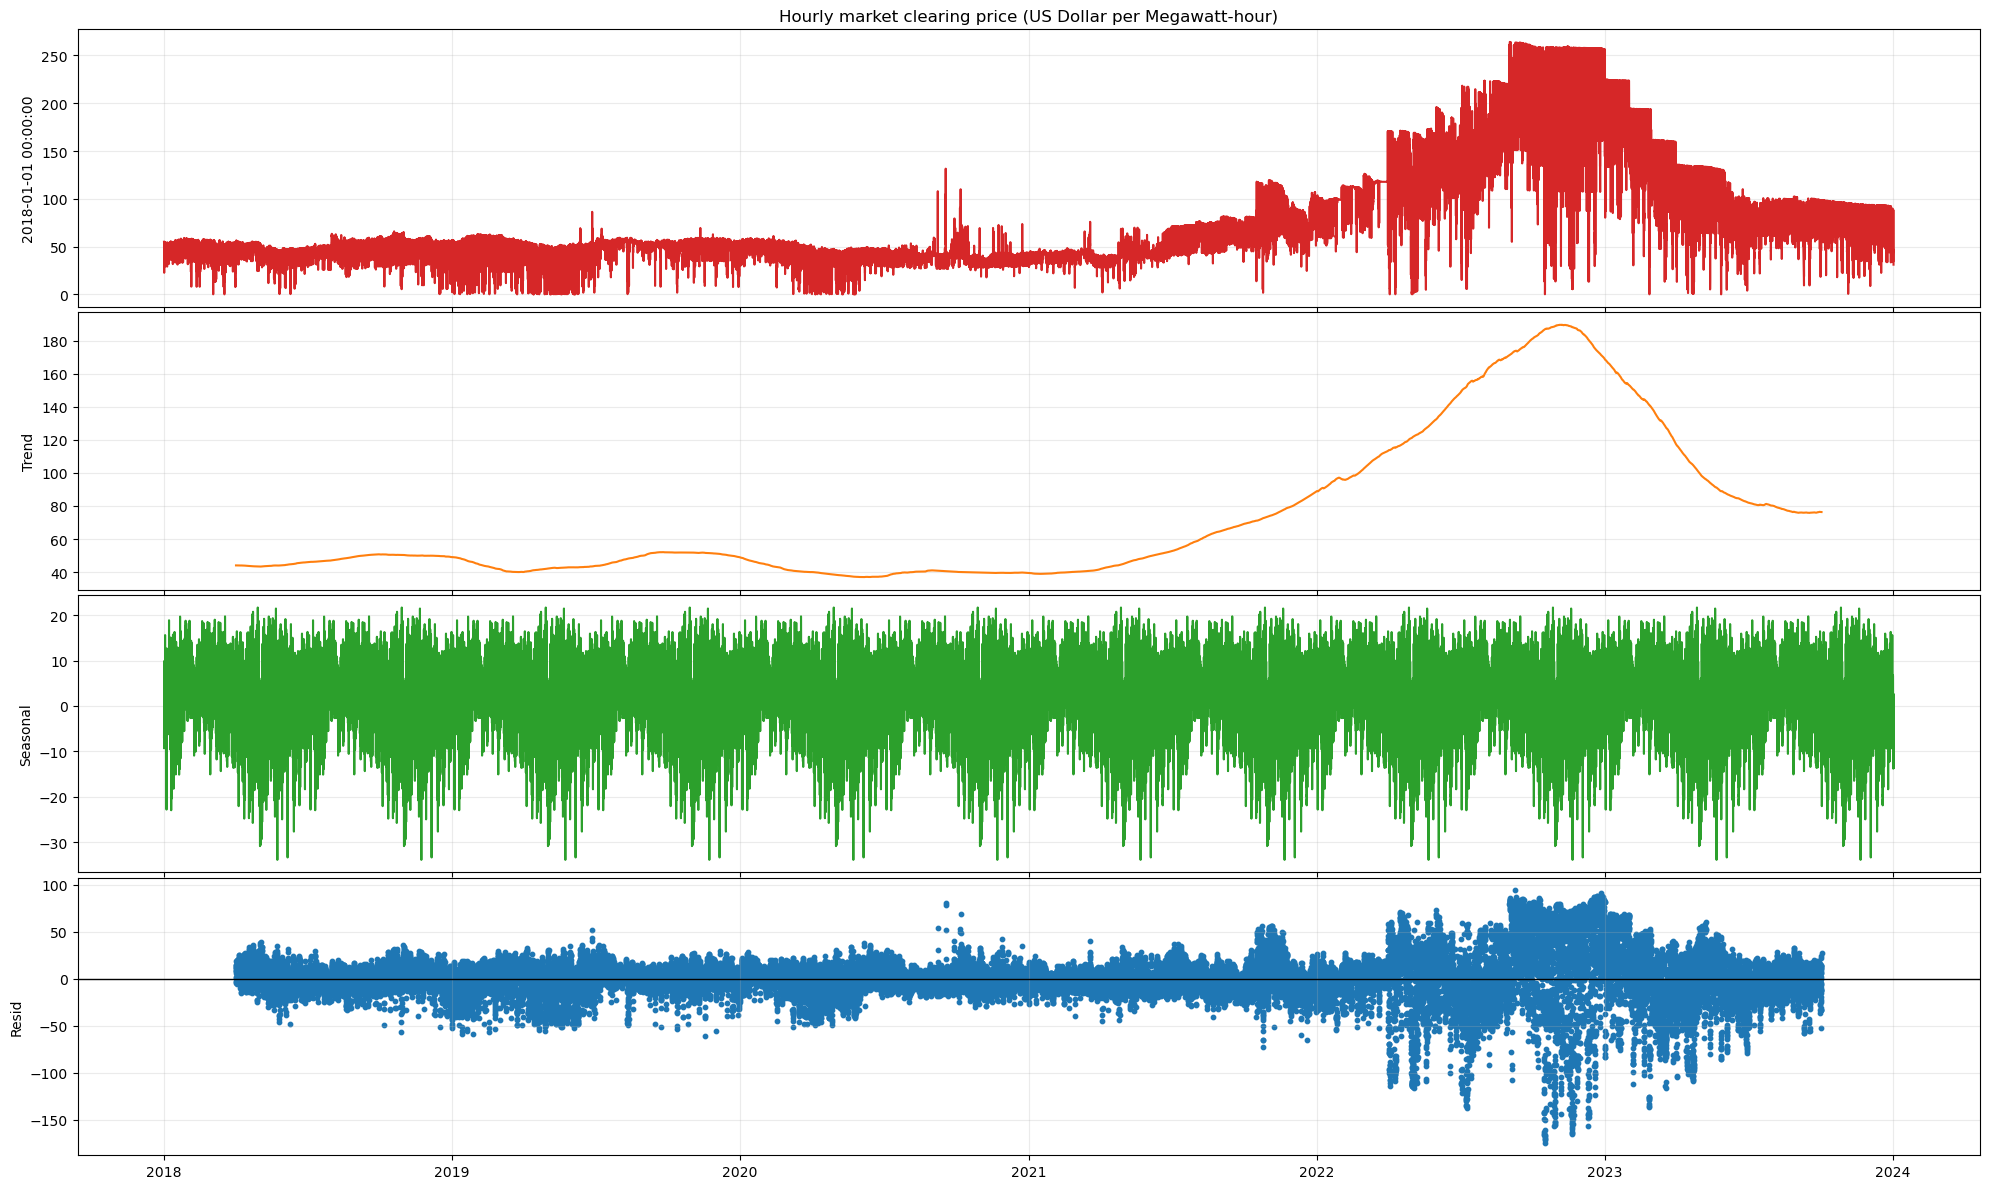

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decompose_plotter(df: pd.DataFrame, period=12, title="", figsize=(20, 12)):
    decomposition = seasonal_decompose(df.values, period=period)
    de_season = decomposition.seasonal
    de_resid = decomposition.resid
    de_trend = decomposition.trend

    fig, ax = plt.subplots(4, sharex=True, figsize=figsize)

    ax[0].set_title(title)
    ax[0].plot(df.index, df.values, color="C3")
    ax[0].set_ylabel(df.keys()[0])
    ax[0].grid(alpha=0.25)

    ax[1].plot(df.index, de_trend, color="C1")
    ax[1].set_ylabel("Trend")
    ax[1].grid(alpha=0.25)

    ax[2].plot(df.index, de_season, color="C2")
    ax[2].set_ylabel("Seasonal")
    ax[2].grid(alpha=0.25)

    ax[3].axhline(y=0, color="k", linewidth=1)
    ax[3].scatter(df.index, de_resid, color="C0", s=10)
    ax[3].set_ylabel("Resid")
    ax[3].grid(alpha=0.25)

    plt.tight_layout(h_pad=0)
    plt.show()

    return decomposition

_ = seasonal_decompose_plotter(df1['PTF (USD/MWh)'], period=365*12, title='Hourly market clearing price (US Dollar per Megawatt-hour)', figsize=(20, 12))
